```
Topic:    Challenge Set 5
Subject:  Linear Regression and Train/Test Split
Date:     02/07/2017
Name:     Prashant Tatineni
```

In [97]:
import pandas as pd
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [3]:
df = pd.read_csv('2013_movies.csv')

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [5]:
y, X = patsy.dmatrices('DomesticTotalGross ~ Budget + Runtime', data=df, return_type="dataframe")

In [10]:
X.head()

,Intercept,Budget,Runtime
0,1.0,130000000.0,146.0
1,1.0,200000000.0,129.0
2,1.0,150000000.0,108.0
3,1.0,76000000.0,98.0
4,1.0,225000000.0,143.0


**Challenge 1**

In [13]:
model = sm.OLS(y, X['Intercept'])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 07 Feb 2017   Prob (F-statistic):                nan
Time:                        14:37:47   Log-Likelihood:                -1753.0
No. Observations:                  89   AIC:                             3508.
Df Residuals:                      88   BIC:                             3511.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.03e+08   9.24e+06     11.148      0.000      8.47e+07  1.21e+08
==============================================================================
Omnibus:                       49.405   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.458
Skew:                           2.051   Prob(JB):                     2.10e-28
Kurtosis:                       7.189   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is representing the null hypothesis.

In [24]:
records = range(89)

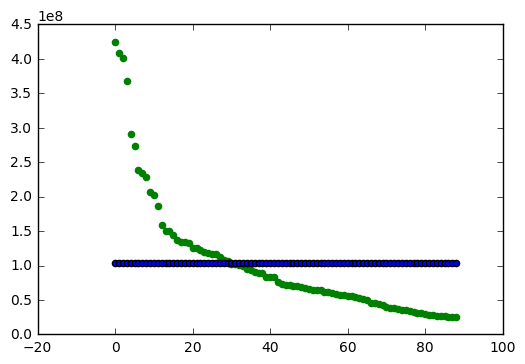

In [32]:
plt.scatter(records, y, color='g')
plt.scatter(records, fit.predict(X['Intercept']))

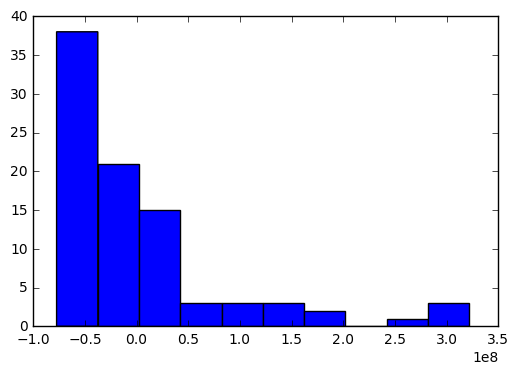

In [51]:
plt.hist((y['DomesticTotalGross'] - fit.predict(X['Intercept'])));

**Challenge 2**

In [58]:
model = sm.OLS(y, X[['Intercept','Budget']])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Tue, 07 Feb 2017   Prob (F-statistic):           6.80e-08
Time:                        15:09:42   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.44e+07   1.27e+07      3.504      0.001      1.92e+07  6.96e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

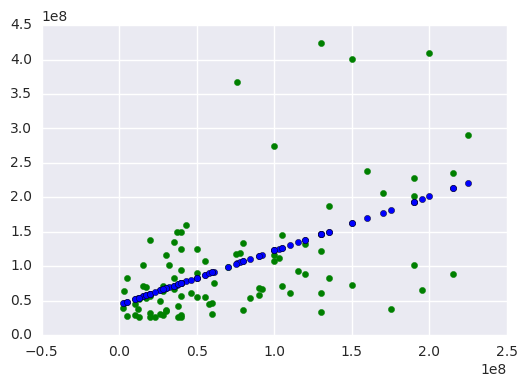

In [59]:
plt.scatter(X['Budget'], y, color='g')
plt.scatter(X['Budget'], fit.predict(X[['Intercept','Budget']]))

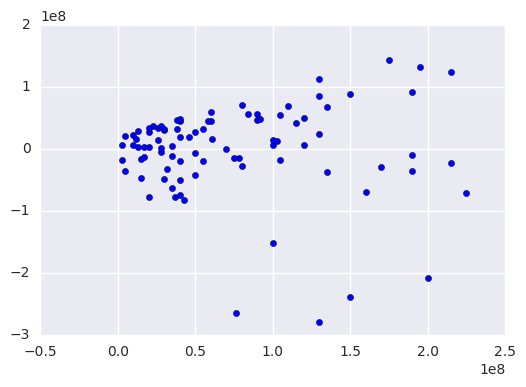

In [61]:
plt.scatter(X['Budget'], fit.predict(X[['Intercept','Budget']]) - y['DomesticTotalGross'])

For higher budget, higher grossing movies there is some spread in the data and the model's residuals are higher

**Challenge 3**

In [66]:
y3, X3 = patsy.dmatrices('DomesticTotalGross ~ Rating', data=df, return_type="dataframe")

In [72]:
X3.head()

,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R]
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0


In [83]:
model = sm.OLS(y3, X3)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Tue, 07 Feb 2017   Prob (F-statistic):             0.0109
Time:                        15:22:55   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        2.685e+08   8.38e+07      3.205      0.002      1.02e+08  4.35e+08
Rating[T.PG]    -1.374e+08   8.65e+07     -1.588      0.116     -3.09e+08  3.44e+07
Rating[T.PG-13]  -1.57e+08   8.47e+07     -1.855      0.067     -3.25e+08   1.1e+07
Rating[T.R]     -1.986e+08   8.49e+07     -2.340      0.021     -3.67e+08 -3.01e+07
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
records3 = range(100)

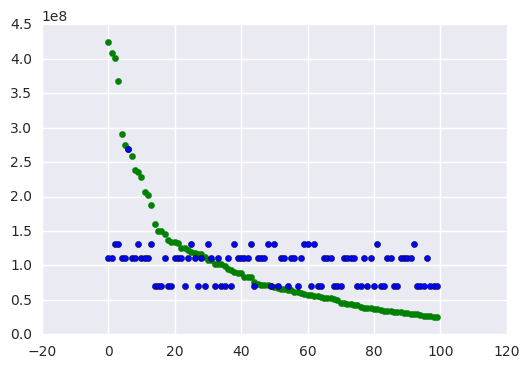

In [90]:
plt.scatter(records3, y3, color='g')
plt.scatter(records3, fit.predict(X3))

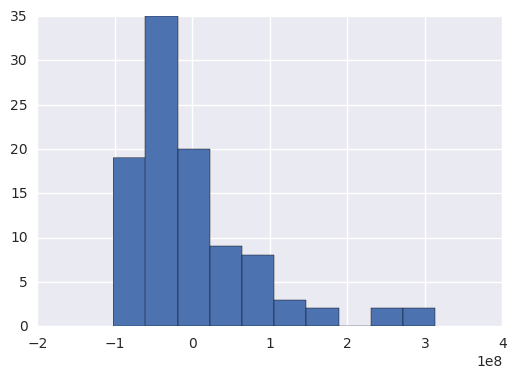

In [91]:
plt.hist((y3['DomesticTotalGross'] - fit.predict(X3)));

Here, the model is using the 'rating' to predict Domestic gross. Since there's 4 ratings, it's predicting one of 4 domestic gross values.

**Challenge 4**

In [92]:
y4, X4 = patsy.dmatrices('DomesticTotalGross ~ Budget + Runtime + Rating', data=df, return_type="dataframe")

In [93]:
X4.head()

,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Budget,Runtime
0,1.0,0.0,1.0,0.0,130000000.0,146.0
1,1.0,0.0,1.0,0.0,200000000.0,129.0
2,1.0,1.0,0.0,0.0,150000000.0,108.0
3,1.0,1.0,0.0,0.0,76000000.0,98.0
4,1.0,0.0,1.0,0.0,225000000.0,143.0


In [94]:
model = sm.OLS(y4, X4)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Tue, 07 Feb 2017   Prob (F-statistic):           3.77e-06
Time:                        15:31:42   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.012e+07   4.05e+07     -0.250      0.803     -9.08e+07  7.05e+07
Rating[T.PG]     1.438e+07   1.74e+07      0.826      0.411     -2.02e+07   4.9e+07
Rating[T.PG-13] -1.342e+07   1.98e+07     -0.677      0.500     -5.28e+07   2.6e+07
Rating[T.R]     -1.109e+07   2.03e+07     -0.547      0.586     -5.14e+07  2.92e+07
Budget              0.7036      0.165      4.255      0.000         0.375     1.032
Runtime          6.083e+05   5.21e+05      1.168      0.246     -4.27e+05  1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     2.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

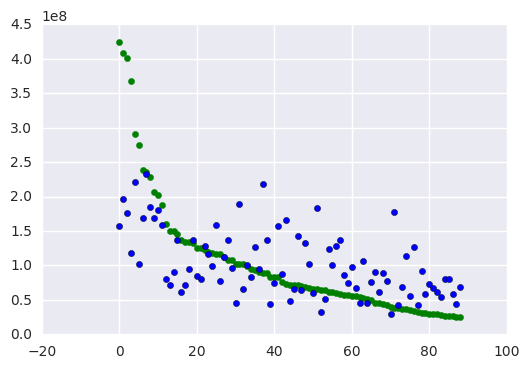

In [96]:
plt.scatter(records, y4, color='g')
plt.scatter(records, fit.predict(X4))

**Challenge 5**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.25)

In [99]:
y_test.shape

(23, 1)

In [100]:
model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     5.274
Date:                Tue, 07 Feb 2017   Prob (F-statistic):            0.00103
Time:                        15:38:13   Log-Likelihood:                -1294.7
No. Observations:                  66   AIC:                             2599.
Df Residuals:                      61   BIC:                             2610.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -9.789e+06   5.14e+07     -0.190      0.850     -1.13e+08   9.3e+07
Rating[T.PG]     2.227e+07   2.28e+07      0.979      0.332     -2.32e+07  6.78e+07
Rating[T.PG-13] -1.653e+07   2.58e+07     -0.640      0.525     -6.82e+07  3.51e+07
Rating[T.R]     -1.553e+07   2.54e+07     -0.611      0.544     -6.64e+07  3.53e+07
Budget              0.6559      0.220      2.983      0.004         0.216     1.096
Runtime          6.422e+05   6.62e+05      0.971      0.336     -6.81e+05  1.96e+06
==============================================================================
Omnibus:                       28.421   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.197
Skew:                           1.561   Prob(JB):                     2.07e-11
Kurtosis:                       5.854   Cond. No.                     5.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
records5 = range(23)

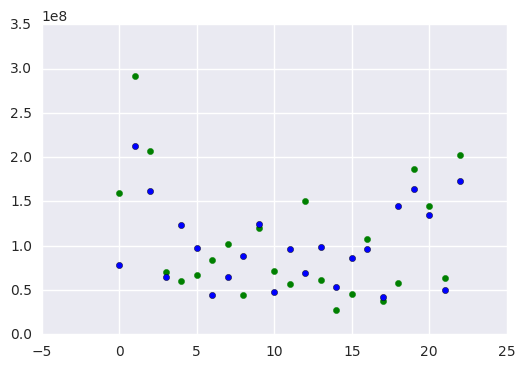

In [102]:
plt.scatter(records5, y_test, color='g')
plt.scatter(records5, fit.predict(X_test))